In [1]:
import os
import sys
import pandas as pd
import math

os.chdir('./scripts')

import load_config
import matplotlib.pyplot as plt
import sweetviz as sv
import numpy as np
import seaborn as sns
import datetime

In [ ]:
os.getcwd()

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [3]:
config = load_config.load_config_const()
plt.style.use('seaborn')

In [4]:
config['files_dgt']

['export_anual_trf_2015.csv.tar.gz',
 'export_anual_trf_2016.csv.tar.gz',
 'export_anual_trf_2017.csv.tar.gz',
 'export_anual_trf_2018.csv.tar.gz',
 'export_anual_trf_2019.csv.tar.gz',
 'export_anual_trf_2020.csv.tar.gz',
 'export_anual_trf_2021.csv.tar.gz']

# Estudio del Dataset de transacciones de turismos de la DGT

In [ ]:
El presente notebook tiene como objetivo hace un estudio de las características relevantes del dataset de transferencias

In [5]:
def cod_postal_zero_int_repair(cod_postal):
    if (not math.isnan( cod_postal )):
        cod_postal = int(cod_postal)
        if ( len(str(cod_postal)) == 5 ):
            return str(cod_postal)
        elif ( len(str(int(cod_postal))) == 4 ):
            return '0'+str(int(cod_postal))
        else:
            return int(cod_postal)
    else:
        return cod_postal

In [6]:
def return_id_province_by_zip(cod_postal):
    if (cod_postal):
        cod_postal = str(cod_postal)
        return cod_postal[0:2]
    else:
        return cod_postal

In [7]:
def is_weekend(day_week):
    if (day_week == 'Saturday' or day_week == 'Sunday'):
        return True
    else:
        return False

In [8]:
def is_weekend(day_week):
    if (day_week == 'Saturday' or day_week == 'Sunday'):
        return True
    else:
        return False

In [9]:
def return_province(id_province):
    list_ids_province = {
        '01': 'Álava',
        '08': 'Barcelona',
        '15': 'La Coruña',
        '23': 'Jaén',
        '30': 'Murcia',
        '38': 'Santa Cruz de Tenerife',
        '45': 'Toledo',
        '02': 'Albacete',
        '09': 'Burgos',
        '16': 'Cuenca',
        '24': 'León',
        '31': 'Navarra',
        '46': 'Valencia',
        '03': 'Alicante',
        '10': 'Cáceres',
        '17': 'Gerona',
        '25': 'Lérida',
        '32': 'Orense',
        '39': 'Cantabria',
        '47': 'Valladolid',
        '04': 'Almería',
        '11': 'Cádiz',
        '18': 'Granada',
        '26': 'La Rioja',
        '33': 'Asturias',
        '40': 'Segovia',
        '48': 'Vizcaya',
        '05': 'Ávila',
        '12': 'Castellón',
        '19': 'Guadalajara',
        '34': 'Palencia',
        '41': 'Sevilla',
        '49': 'Zamora',
        '06': 'Badajoz',
        '13': 'Ciudad Real',
        '20': 'Guipúzcoa',
        '27': 'Lugo',
        '35': 'Las Palmas',
        '42': 'Soria',
        '50': 'Zaragoza',
        '07': 'Islas Baleares',
        '21': 'Huelva',
        '28': 'Madrid',
        '36': 'Pontevedra',
        '43': 'Tarragona',
        '51': 'Ceuta',
        '14': 'Córdoba',
        '22': 'Huesca',
        '29': 'Málaga',
        '37': 'Salamanca',
        '44': 'Teruel',
        '52': 'Melilla'
    }
    
    return list_ids_province.get(id_province)

In [10]:
def return_make(make):
    list_makes = {
        'ABARTH': 'ABARTH',
        'ALFA': 'ALFA ROMEO',
        'ALFA ROMEO': '',
        'ASTON MARTIN': 'ASTON MARTIN',
        'AUDI': 'AUDI',
        'BENTLEY': 'BENTLEY',
        'BMW': 'BMW',
        'BMW I': 'BMW',
        'CADILLAC': 'CADILLAC',
        'CHEVROLET': 'CHEVROLET',
        'CHRYSLER': 'CHRYSLER',
        'CITROEN': 'CITROEN',
        'CUPRA': 'CUPRA',
        'DACIA': 'DACIA',
        'DAEWOO': 'DAEWOO',
        'DAIHATSU': 'DAIHATSU',
        'DAIMLER': 'DAIMLER',
        'DAIMLER AG': 'DAIMLER',
        'DAIMLER CHRYSLER': 'CHRYSLER',
        'DODGE': 'DODGE',
        'DS': 'DS',
        'FERRARI': 'FERRARI',
        'FIAT': 'FIAT',
        'FORD': 'FORD',
        'FORD CNG TECHNIK': 'FORD',
        'FORD-CNG-TECHNIK': 'FORD',
        'GMC': 'GMC',
        'HONDA': 'HONDA',
        'HUMMER': 'HUMMER',
        'HYUNDAI': 'HYUNDAI',
        'INFINITI': 'INFINITI',
        'ISUZU': 'ISUZU',
        'IVECO': 'IVECO',
        'JAGUAR': 'JAGUAR',
        'JAGUAR LAND ROVER LIMIT': 'LAND-ROVER',
        'JEEP': 'JEEP',
        'KIA': 'KIA',
        'LADA': 'LADA',
        'LAMBORGHINI': 'LAMBORGHINI',
        'LANCIA': 'LANCIA',
        'LAND ROVER': 'LAND-ROVER',
        'LEXUS': 'LEXUS',
        'LOTUS': 'LOTUS',
        'M.G': 'MG',
        'MAHINDRA': 'MAHINDRA',
        'MASERATI': 'MASERATI',
        'MAZDA': 'MAZDA',
        'MCC SMART': 'SMART',
        'MCLAREN': 'MCLAREN',
        'MERCEDES': 'MERCEDES-BENZ',
        'MERCEDES-AMG': 'MERCEDES-BENZ',
        'MERCEDES-BENZ': 'MERCEDES-BENZ',
        'MG': 'MG',
        'MICRO COMPACT CAR': 'SMART',
        'MINI': 'MINI',
        'MITSUBISHI': 'MITSUBISHI',
        'NISSAN': 'NISSAN',
        'OPEL': 'OPEL',
        'PEUGEOT': 'PEUGEOT',
        'PORSCHE': 'PORSCHE',
        'QUATTRO': 'AUDI',
        'RANGE ROVER': 'ROVER',
        'RENAULT': 'RENAULT',
        'ROVER': 'ROVER',
        'SAAB': 'SAAB',
        'SANTANA': 'SANTANA',
        'SEAT': 'SEAT',
        'SEAT FIAT': 'SEAT',
        'SKODA': 'SKODA',
        'SMART': 'SMART',
        'SSANGYONG': 'SSANGYONG',
        'SUBARU': 'SUBARU',
        'SUZUKI': 'SUZUKI',
        'SUZUKI SANTANA': 'SANTANA',
        'TATA': 'TATA',
        'TESLA': 'TESLA',
        'TESLA MOTORS': 'TESLA',
        'TOYOTA': 'TOYOTA',
        'VOLKSWAGEN': 'VOLKSWAGEN',
        'VOLKSWAGEN V W': 'VOLKSWAGEN',
        'VOLVO': 'VOLVO',
    }
    
    return list_makes.get(make)

In [11]:
def return_avaliable_makes():
    return [
        'ABARTH',
        'ALFA',
        'ALFA ROMEO',
        'ASTON MARTIN',
        'AUDI',
        'BENTLEY',
        'BMW',
        'BMW I',
        'CADILLAC',
        'CHEVROLET',
        'CHRYSLER',
        'CITROEN',
        'CUPRA',
        'DACIA',
        'DAEWOO',
        'DAIHATSU',
        'DAIMLER',
        'DAIMLER AG',
        'DAIMLER CHRYSLER',
        'DODGE',
        'DS',
        'FERRARI',
        'FIAT',
        'FORD',
        'FORD CNG TECHNIK',
        'FORD-CNG-TECHNIK',
        'GMC',
        'HONDA',
        'HUMMER',
        'HYUNDAI',
        'INFINITI',
        'ISUZU',
        'IVECO',
        'JAGUAR',
        'JAGUAR LAND ROVER LIMIT',
        'JEEP',
        'KIA',
        'LADA',
        'LAMBORGHINI',
        'LANCIA',
        'LAND ROVER',
        'LEXUS',
        'LOTUS',
        'M.G',
        'MAHINDRA',
        'MASERATI',
        'MAZDA',
        'MCC SMART',
        'MCLAREN',
        'MERCEDES',
        'MERCEDES-AMG',
        'MERCEDES-BENZ',
        'MG',
        'MICRO COMPACT CAR',
        'MINI',
        'MITSUBISHI',
        'NISSAN',
        'OPEL',
        'PEUGEOT',
        'PORSCHE',
        'QUATTRO',
        'RANGE ROVER',
        'RENAULT',
        'ROVER',
        'SAAB',
        'SANTANA',
        'SEAT',
        'SEAT FIAT',
        'SKODA',
        'SMART',
        'SSANGYONG',
        'SUBARU',
        'SUZUKI',
        'SUZUKI SANTANA',
        'TATA',
        'TESLA',
        'TESLA MOTORS',
        'TOYOTA',
        'VOLKSWAGEN',
        'VOLKSWAGEN V W',
        'VOLVO'
    ]

In [12]:
columns = config['fields_dgt_process']


df = '';

for dgt_file in config['files_dgt']:

    route_file = config['base_route'] + config['data_route'] +  config['data_dgt_route'] + '/' + dgt_file
    
    print(f'Processing {dgt_file}')
    
    df_aux = pd.read_csv(route_file, compression='gzip', sep=config['csv_dgt_separator'], low_memory=False)
    df_aux.columns = columns
    
    
    df_aux = df_aux.sample(frac=0.4)
    
    
    df_aux['FEC_MATRICULA'] = pd.to_datetime(df_aux['FEC_MATRICULA'])
    df_aux['FEC_TRAMITACION'] = pd.to_datetime(df_aux['FEC_TRAMITACION'])
    df_aux['FEC_TRAMITE'] = pd.to_datetime(df_aux['FEC_TRAMITE'])
    df_aux['FEC_PRIM_MATRICULACION'] = pd.to_datetime(df_aux['FEC_PRIM_MATRICULACION'])
    
    
    df_aux = df_aux[df_aux['MARCA_ITV'].isin( return_avaliable_makes() )]
    df_aux['MARCA_ITV'] = df_aux['MARCA_ITV'].apply(lambda x: return_make(x) )
    df_aux = df_aux[df_aux['MARCA_ITV'] != '']
    
    
    df_aux['Q_query'] = df_aux['Q_query'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['year_Q'] = df_aux['year_Q'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['CODIGO_POSTAL'] = df_aux['CODIGO_POSTAL'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['CLAVE_TRAMITE'] = df_aux['CLAVE_TRAMITE'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['NUM_TRANSMISIONES'] = df_aux['NUM_TRANSMISIONES'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['NUM_PLAZAS'] = df_aux['NUM_PLAZAS'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['NUM_TITULARES'] = df_aux['NUM_TITULARES'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['CILINDRADA_ITV'] = df_aux['CILINDRADA_ITV'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['COD_MUNICIPIO_INE_VEH'] = df_aux['COD_MUNICIPIO_INE_VEH'].apply(lambda x: int(x) if not math.isnan(x) else x )
    # df_aux['KW_ITV'] = df_aux['KW_ITV'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['NUM_PLAZAS_MAX'] = df_aux['NUM_PLAZAS_MAX'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['CO2_ITV'] = df_aux['CO2_ITV'].apply(lambda x: int(x) if not math.isnan(x) else x )
    
    df_aux['CODIGO_POSTAL'] = df_aux['CODIGO_POSTAL'].apply(lambda x: cod_postal_zero_int_repair(x) )
    df_aux['COD_MUNICIPIO_INE_VEH'] = df_aux['COD_MUNICIPIO_INE_VEH'].apply(lambda x: cod_postal_zero_int_repair(x) )
    df_aux['ID_MUNICIPIO'] = df_aux['COD_MUNICIPIO_INE_VEH'].apply(lambda x: return_id_province_by_zip(x) )
    
    df_aux = df_aux[df_aux['FEC_TRAMITACION'] >= '2015-01-01 00:00:00']
    df_aux = df_aux[df_aux['FEC_TRAMITACION'] <= '2021-12-31 23:59:59']
    
    df_aux = df_aux[df_aux['FEC_TRAMITE'] >= '2015-01-01 00:00:00']
    df_aux = df_aux[df_aux['FEC_TRAMITE'] <= '2021-12-31 23:59:59']
    
    df_aux['ID_MUNICIPIO'].fillna(value=np.nan, inplace=True)
    
    df_aux = df_aux[df_aux['ID_MUNICIPIO'].notna()]
    df_aux = df_aux[df_aux['year_Q'].notna()]
    
    df_aux = df_aux[df_aux['ID_MUNICIPIO'] != 0]
    
    df_aux['year_Q'] = df_aux['year_Q'].apply(lambda x: int(x) if not math.isnan(x) else x )
    df_aux['Q_query'] = df_aux['Q_query'].apply(lambda x: int(x) if not math.isnan(x) else x )

    df_aux['month_year_Q'] = df_aux['FEC_TRAMITE'].dt.month
    
    index = df_aux.index
    number_of_rows = len(index)
    print(f'### Lines -> {number_of_rows}')
    
    if (type(df) == pd.core.frame.DataFrame):
        print('### Merge with main datagrame')
        df = pd.concat([df,df_aux]);
    else:
        print('### Create main datagrame')
        
        df = df_aux.copy()
        
    del df_aux
    
    index = df.index
    number_of_rows = len(index)
    print(f'### Total lines -> {number_of_rows}')

Processing export_anual_trf_2015.csv.tar.gz
### Lines -> 902040
### Create main datagrame
### Total lines -> 902040
Processing export_anual_trf_2016.csv.tar.gz
### Lines -> 981076
### Merge with main datagrame
### Total lines -> 1883116
Processing export_anual_trf_2017.csv.tar.gz
### Lines -> 1095284
### Merge with main datagrame
### Total lines -> 2978400
Processing export_anual_trf_2018.csv.tar.gz
### Lines -> 1171626
### Merge with main datagrame
### Total lines -> 4150026
Processing export_anual_trf_2019.csv.tar.gz
### Lines -> 1186237
### Merge with main datagrame
### Total lines -> 5336263
Processing export_anual_trf_2020.csv.tar.gz
### Lines -> 1003392
### Merge with main datagrame
### Total lines -> 6339655
Processing export_anual_trf_2021.csv.tar.gz
### Lines -> 1119053
### Merge with main datagrame
### Total lines -> 7458708


In [13]:
df.sample(10)

,FEC_MATRICULA,COD_CLASE_MAT,FEC_TRAMITACION,MARCA_ITV,MODELO_ITV,COD_PROCEDENCIA_ITV,COD_PROPULSION_ITV,CILINDRADA_ITV,POTENCIA_ITV,NUM_PLAZAS,NUM_TRANSMISIONES,NUM_TITULARES,LOCALIDAD_VEHICULO,COD_PROVINCIA_VEH,COD_PROVINCIA_MAT,CLAVE_TRAMITE,FEC_TRAMITE,CODIGO_POSTAL,FEC_PRIM_MATRICULACION,IND_NUEVO_USADO,PERSONA_FISICA_JURIDICA,COD_MUNICIPIO_INE_VEH,MUNICIPIO,KW_ITV,NUM_PLAZAS_MAX,CO2_ITV,RENTING,CATEGORÍA_HOMOLOGACIÓN_EUROPEA_ITV,NIVEL_EMISIONES_EURO_ITV,CONSUMO_WH/KM_ITV,CATEGORÍA_VEHÍCULO_ELÉCTRICO,AUTONOMÍA_VEHÍCULO_ELÉCTRICO,year_Q,Q_query,ID_MUNICIPIO,month_year_Q
1627955,2015-02-25,0.0,2015-11-26,BMW,320D,3.0,1,1995,13.29,5,2,1,NaN,M,M,2,2015-10-05,28180,NaT,N,X,28151,TORRELAGUNA,135.00,5,118.0,N,M1,EURO 5J,0.0,NaN,0.0,2015,4,28,10
1890660,2019-05-31,0.0,2019-08-29,SEAT,LEON ST,3.0,0,1498,11.19,5,1,1,NaN,B,B,2,2019-08-29,08917,NaT,N,D,08015,BADALONA,96.00,5,113.0,N,M1,EURO 6AG,0.0,NaN,0.0,2019,3,08,8
1345857,2003-02-11,0.0,2019-06-18,KIA,KIA SHUMA II,1.0,0,1594,11.00,5,1,1,AGUADULCE,AL,AL,2,2019-06-18,04720,NaT,N,D,04079,ROQUETAS DE MAR,0.00,5,NaN,N,M1,EURO 3,0.0,NaN,NaN,2019,2,04,6
1129506,2007-05-28,0.0,2019-05-23,BMW,318D BERLINA,3.0,1,1995,13.30,5,4,1,NaN,SE,M,2,2019-05-23,41007,NaT,N,D,41091,SEVILLA,90.00,5,NaN,N,M1,EURO 4,0.0,NaN,NaN,2019,2,41,5
2793865,2006-10-27,0.0,2021-12-29,RENAULT,LAGUNA,3.0,1,1870,0.13,5,3,1,NaN,PO,M,2,2021-12-29,36315,NaT,N,D,36057,VIGO,96.00,5,NaN,N,M1,EURO 4B,0.0,NaN,NaN,2021,4,36,12
1626066,2021-07-28,0.0,2021-08-02,VOLKSWAGEN,GOLF,3.0,0,999,7.82,5,1,1,NaN,TO,TO,2,2021-08-02,45800,NaT,N,X,45142,QUINTANAR DE ORDEN,81.00,5,118.0,N,M1,EURO 6AP,0.0,HEV,0.0,2021,3,45,8
1458180,2013-10-15,0.0,2015-09-07,SKODA,FABIA,3.0,0.0,1197,9.78,5,1,1,NaN,GC,GC,2,2015-09-07,35250,NaT,N,D,35011,INGENIO,63.00,5,119.0,N,M1,EURO 5,0.0,NaN,NaN,2015,3,35,9
1437837,2010-07-01,0.0,2020-09-09,FIAT,FIAT PANDA,3.0,0,1242,10.00,5,4,1,NaN,GC,GC,2,2020-08-27,35400,NaT,N,D,35006,ARUCAS,10.00,5,NaN,N,M1,EURO 4,0.0,NaN,NaN,2020,3,35,8
2225369,2003-12-29,0.0,2020-12-04,BMW,320TD MAN,3.0,1.0,1995,13.30,5,7,1,NaN,M,M,2,2020-11-27,28033,NaT,N,D,28079,MADRID,0.00,5,NaN,N,M1,EURO 3,0.0,NaN,NaN,2020,4,28,11
1137496,2010-11-30,0.0,2016-06-22,FORD,FOCUS,0.0,1,1560,11.47,5,2,1,NaN,IB,IB,2,2016-06-22,07350,NaT,N,D,07008,BINISSALEM,80.00,5,119.0,N,M1,EURO 4,0.0,NaN,NaN,2016,2,07,6


In [14]:
len(df.index)

7458708

In [15]:
df.dtypes

FEC_MATRICULA                         datetime64[ns]
COD_CLASE_MAT                                float64
FEC_TRAMITACION                       datetime64[ns]
MARCA_ITV                                     object
MODELO_ITV                                    object
COD_PROCEDENCIA_ITV                          float64
COD_PROPULSION_ITV                            object
CILINDRADA_ITV                                 int64
POTENCIA_ITV                                 float64
NUM_PLAZAS                                     int64
NUM_TRANSMISIONES                              int64
NUM_TITULARES                                  int64
LOCALIDAD_VEHICULO                            object
COD_PROVINCIA_VEH                             object
COD_PROVINCIA_MAT                             object
CLAVE_TRAMITE                                  int64
FEC_TRAMITE                           datetime64[ns]
CODIGO_POSTAL                                 object
FEC_PRIM_MATRICULACION                datetime

In [ ]:
my_report = sv.analyze(df)
my_report.show_notebook()

In [16]:
df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

,FEC_TRAMITE,counts
0,2015-01-01,1
1,2015-01-02,1004
2,2015-01-03,4
3,2015-01-04,37
4,2015-01-05,1624
...,...,...
2407,2021-12-27,7359
2408,2021-12-28,6402
2409,2021-12-29,7354
2410,2021-12-30,7331


<AxesSubplot:xlabel='FEC_TRAMITE', ylabel='counts'>

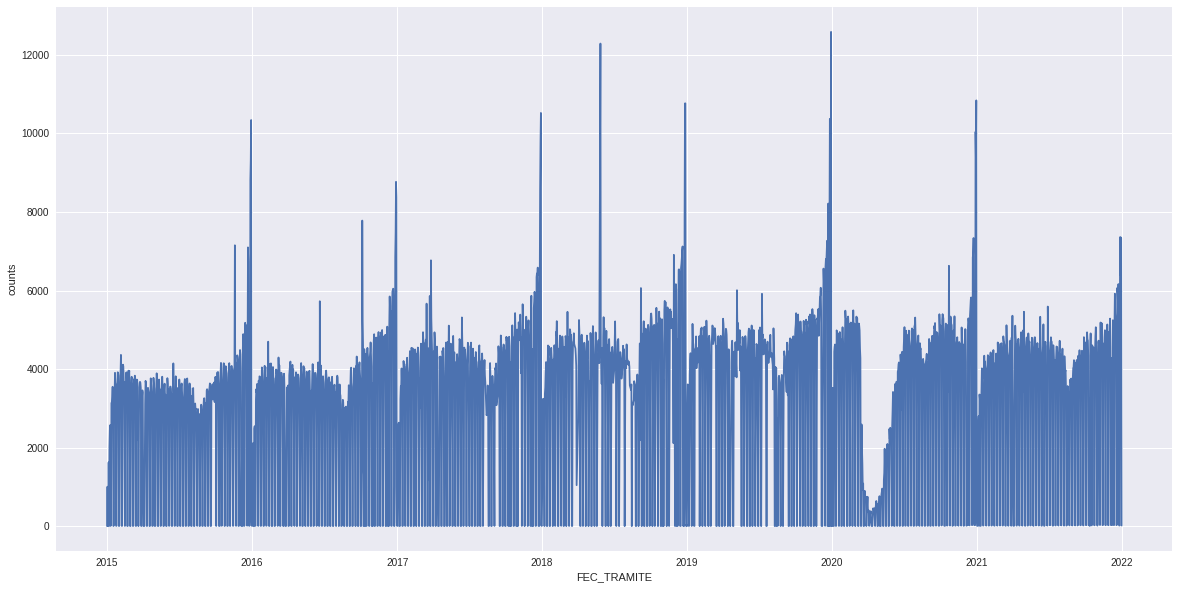

In [17]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

sns.lineplot(data=grouped, x='FEC_TRAMITE', y='counts')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2015-01-01') & (grouped['FEC_TRAMITE'] < '2015-12-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2015-01-01') & (grouped['FEC_TRAMITE'] < '2015-12-31')]['counts']
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2016-01-01') & (grouped['FEC_TRAMITE'] < '2016-12-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2016-01-01') & (grouped['FEC_TRAMITE'] < '2016-12-31')]['counts']
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2017-01-01') & (grouped['FEC_TRAMITE'] < '2017-12-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2017-01-01') & (grouped['FEC_TRAMITE'] < '2017-12-31')]['counts']
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2018-01-01') & (grouped['FEC_TRAMITE'] < '2018-12-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2018-01-01') & (grouped['FEC_TRAMITE'] < '2018-12-31')]['counts']
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2019-01-01') & (grouped['FEC_TRAMITE'] < '2019-12-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2019-01-01') & (grouped['FEC_TRAMITE'] < '2019-12-31')]['counts']
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2020-01-01') & (grouped['FEC_TRAMITE'] <= '2020-12-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2020-01-01') & (grouped['FEC_TRAMITE'] <= '2020-12-31')]['counts']
)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2021-01-01') & (grouped['FEC_TRAMITE'] <= '2021-12-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2021-01-01') & (grouped['FEC_TRAMITE'] <= '2021-12-31')]['counts']
)

<AxesSubplot:xlabel='day_of_year', ylabel='counts'>

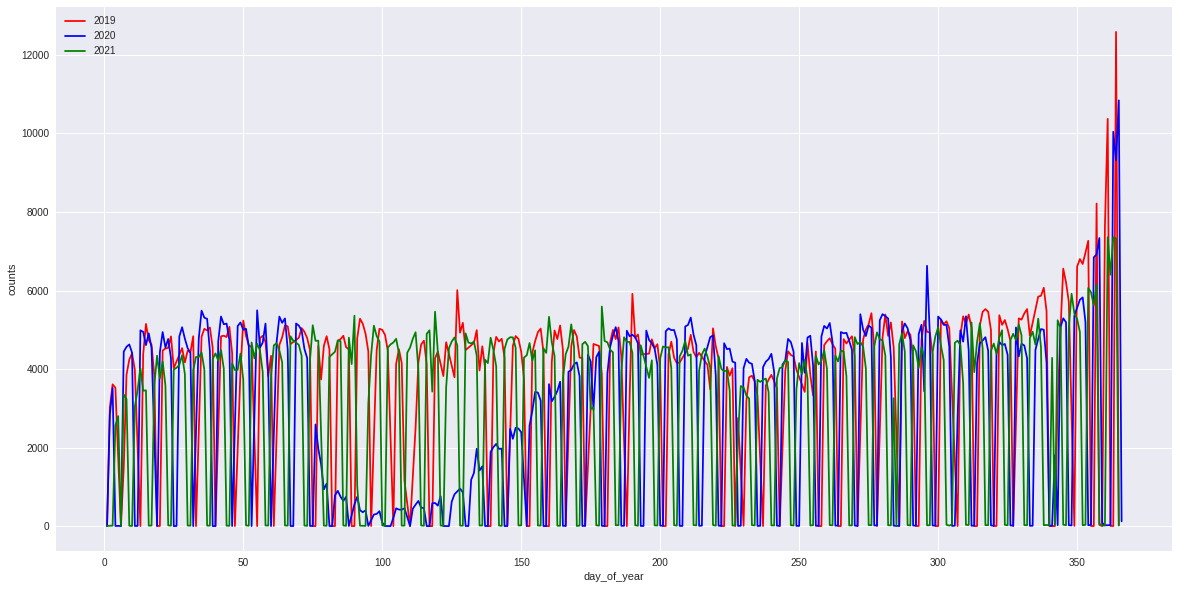

In [18]:
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

grouped['day_of_year'] = grouped['FEC_TRAMITE'].dt.dayofyear
grouped['year'] = grouped['FEC_TRAMITE'].dt.year

fig, ax = plt.subplots(figsize=(20,10))

#2019 -> red
sns.lineplot(data=grouped[(grouped['FEC_TRAMITE'] >= '2019-01-01') & (grouped['FEC_TRAMITE'] <= '2019-12-31')], x='day_of_year', y='counts', color='red', label='2019')
#2020 -> blue
sns.lineplot(data=grouped[(grouped['FEC_TRAMITE'] >= '2020-01-01') & (grouped['FEC_TRAMITE'] <= '2020-12-31')], x='day_of_year', y='counts', color='blue', label='2020')
#2020 -> green
sns.lineplot(data=grouped[(grouped['FEC_TRAMITE'] >= '2021-01-01') & (grouped['FEC_TRAMITE'] <= '2021-12-31')], x='day_of_year', y='counts', color='green', label='2021')




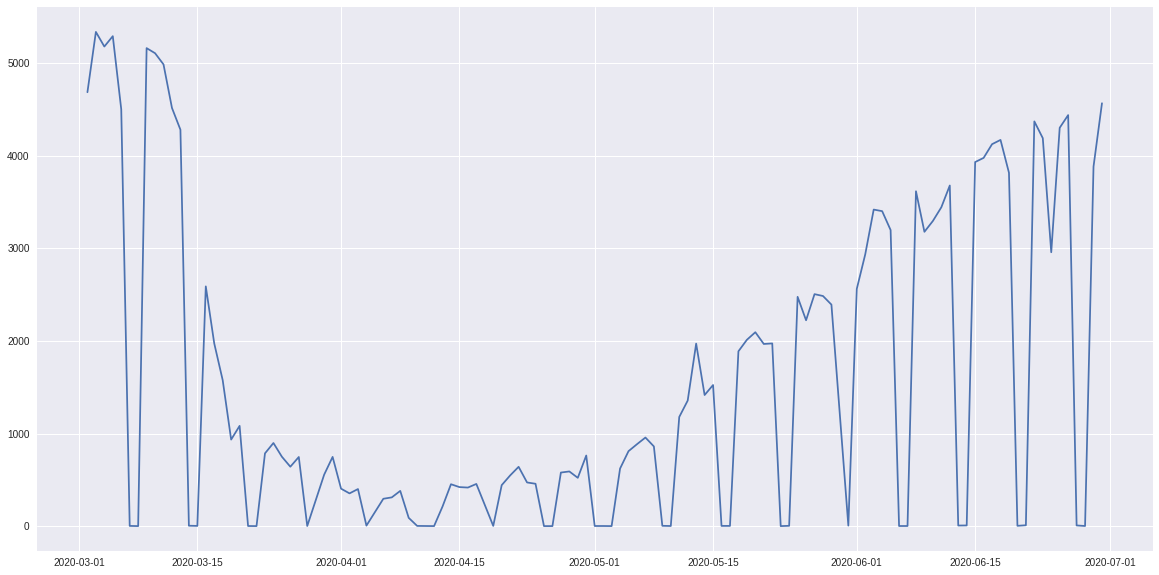

In [19]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2020-03-01') & (grouped['FEC_TRAMITE'] <= '2020-06-30')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2020-03-01') & (grouped['FEC_TRAMITE'] <= '2020-06-30')]['counts']
)

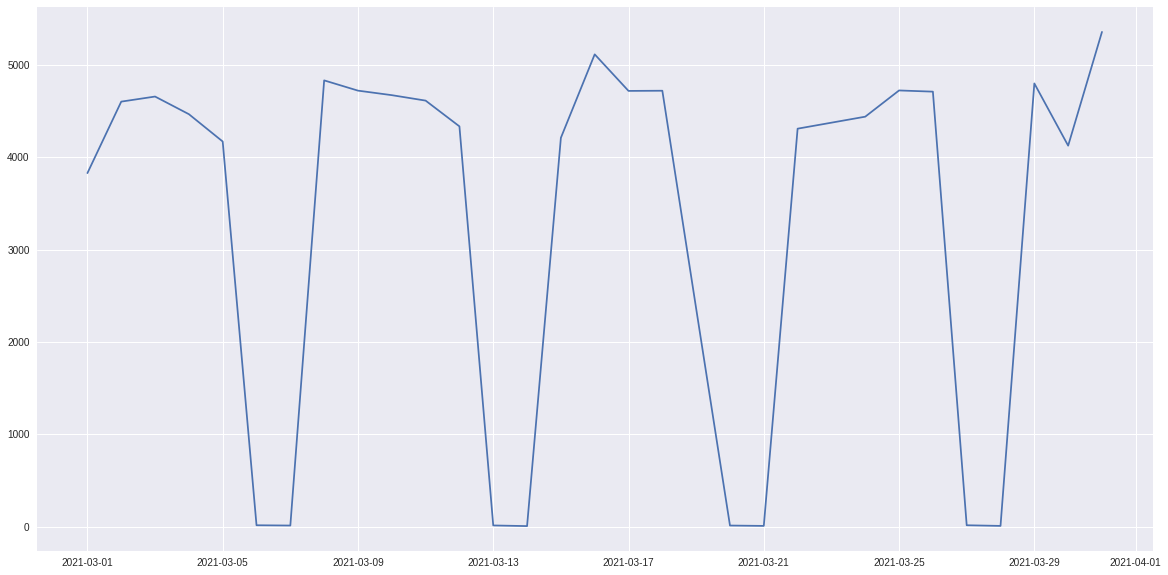

In [20]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2021-03-01') & (grouped['FEC_TRAMITE'] <= '2021-03-31')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2021-03-01') & (grouped['FEC_TRAMITE'] <= '2021-03-31')]['counts']
)

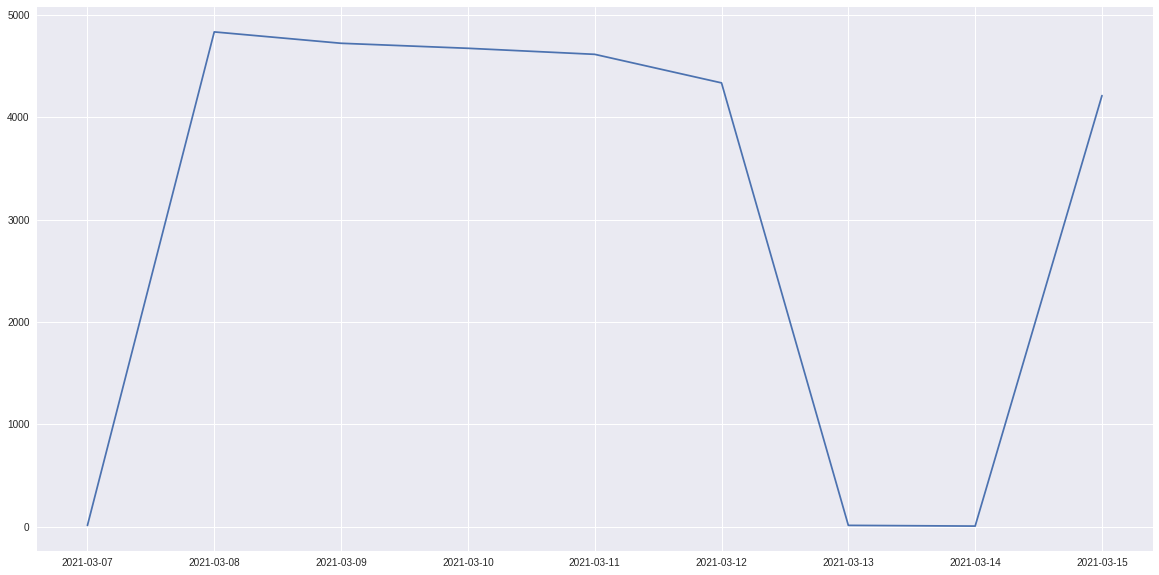

In [21]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['FEC_TRAMITE']).size().reset_index(name='counts')

plt.plot(
    grouped[(grouped['FEC_TRAMITE'] >= '2021-03-07') & (grouped['FEC_TRAMITE'] <= '2021-03-15')]['FEC_TRAMITE'],
    grouped[(grouped['FEC_TRAMITE'] >= '2021-03-07') & (grouped['FEC_TRAMITE'] <= '2021-03-15')]['counts']
)

In [22]:
df['day_of_week'] = df['FEC_TRAMITE'].dt.day_name()
df.groupby(['day_of_week']).size().reset_index(name='counts')

,day_of_week,counts
0,Friday,1393702
1,Monday,1449369
2,Saturday,2997
3,Sunday,1879
4,Thursday,1531689
5,Tuesday,1529877
6,Wednesday,1549195


In [23]:
def is_weekend(day_week):
    if (day_week == 'Saturday' or day_week == 'Sunday'):
        return True
    else:
        return False

In [24]:
df['day_of_week'].apply(lambda x: is_weekend(x))

2206206    False
493451     False
2265822    False
606995     False
1850653    False
           ...  
824744     False
1766498    False
1631001    False
2031380    False
2022509    False
Name: day_of_week, Length: 7458708, dtype: bool

In [25]:
df['is_weekend'] = df['day_of_week'].apply(lambda x: is_weekend(x))

In [26]:
df[df['is_weekend'] == True ].sample(20)

,FEC_MATRICULA,COD_CLASE_MAT,FEC_TRAMITACION,MARCA_ITV,MODELO_ITV,COD_PROCEDENCIA_ITV,COD_PROPULSION_ITV,CILINDRADA_ITV,POTENCIA_ITV,NUM_PLAZAS,NUM_TRANSMISIONES,NUM_TITULARES,LOCALIDAD_VEHICULO,COD_PROVINCIA_VEH,COD_PROVINCIA_MAT,CLAVE_TRAMITE,FEC_TRAMITE,CODIGO_POSTAL,FEC_PRIM_MATRICULACION,IND_NUEVO_USADO,PERSONA_FISICA_JURIDICA,COD_MUNICIPIO_INE_VEH,MUNICIPIO,KW_ITV,NUM_PLAZAS_MAX,CO2_ITV,RENTING,CATEGORÍA_HOMOLOGACIÓN_EUROPEA_ITV,NIVEL_EMISIONES_EURO_ITV,CONSUMO_WH/KM_ITV,CATEGORÍA_VEHÍCULO_ELÉCTRICO,AUTONOMÍA_VEHÍCULO_ELÉCTRICO,year_Q,Q_query,ID_MUNICIPIO,month_year_Q,day_of_week,is_weekend
2949214,2018-05-11,0.0,2018-12-29,TOYOTA,TOYOTA AURIS,3.0,0,1197,9.78,5,1,1,COTOS DE MONTERREY,M,M,2,2018-12-29,28729,NaT,N,X,28169,VENTURADA,85.00,5,112.0,N,M1,EURO 6 W,0.0,NaN,0.0,2018,4,28,12,Saturday,True
2948965,2018-05-11,0.0,2018-12-29,TOYOTA,TOYOTA VERSO,1.0,1,1598,11.64,7,1,1,COTOS DE MONTERREY,M,M,2,2018-12-29,28729,NaT,N,X,28169,VENTURADA,82.00,7,119.0,N,M1,EURO 6 W,0.0,NaN,0.0,2018,4,28,12,Saturday,True
201546,2001-04-17,0.0,2021-01-03,AUDI,A6,3.0,0.0,1781,12.42,5,5,1,NaN,CS,CS,2,2021-01-03,12110,1998-07-20,U,D,12005,ALCORA,0.00,5,NaN,N,M1,EURO 2,0.0,NaN,NaN,2021,1,12,1,Sunday,True
2949441,2018-05-28,0.0,2018-12-29,OPEL,CORSA-E,3.0,0,1398,10.74,5,1,1,NaN,M,M,2,2018-12-29,28649,NaT,N,X,28128,ROZAS DE PUERTO REAL,66.00,5,120.0,N,M1,EURO 6W,0.0,NaN,0.0,2018,4,28,12,Saturday,True
2949326,2005-07-29,0.0,2018-12-29,OPEL,MERIVA,0.0,1,1248,10.02,5,2,1,NaN,M,M,2,2018-12-29,28970,NaT,N,D,28073,HUMANES DE MADRID,0.00,5,NaN,N,M1,EURO 3,0.0,NaN,NaN,2018,4,28,12,Saturday,True
1491380,2004-01-30,0.0,2020-08-29,RENAULT,MEGANE,0.0,1,1870,12.78,5,4,1,NaN,BA,BA,2,2020-08-29,06600,NaT,N,D,06023,CABEZA DEL BUEY,0.00,5,NaN,N,M1,EURO 3A,0.0,NaN,NaN,2020,3,06,8,Saturday,True
2473562,2007-02-13,0.0,2017-01-11,CHEVROLET,KALOS,1.0,0.0,1399,10.74,5,2,1,GRANADA,GR,GR,2,2016-12-31,18011,NaT,N,D,18087,GRANADA,0.00,5,NaN,N,M1,EURO 4,0.0,NaN,NaN,2016,4,18,12,Saturday,True
1728939,2006-05-16,0.0,2021-08-14,AUDI,A4 2.5 TDI,3.0,1,2496,17.88,5,3,1,HUETOR VEGA,GR,GR,2,2021-08-14,18198,2006-02-01,U,D,18101,HUETOR VEGA,0.00,5,NaN,N,M1,EURO 4,0.0,NaN,NaN,2021,3,18,8,Saturday,True
2480282,2017-10-25,0.0,2021-10-21,MAZDA,MAZDA CX-5,1.0,0,1998,0.13,5,1,1,MORON DE LA FRONTERA,SE,V,2,2021-11-21,41530,NaT,N,D,41065,MORON DE LA FRONTERA,121.00,5,149.0,N,M1,EURO 6W,0.0,NaN,0.0,2021,4,41,11,Sunday,True
2345151,2017-08-31,0.0,2020-12-12,BMW,X1 SDRIVE18D,3.0,1,1995,13.29,5,2,1,NaN,M,TO,2,2020-12-12,28022,NaT,N,X,28079,MADRID,110.00,5,114.0,N,M1,EURO 6 W,0.0,NaN,0.0,2020,4,28,12,Saturday,True


In [27]:
df.groupby(['MARCA_ITV']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(100)

,MARCA_ITV,counts
51,SEAT,701857
47,RENAULT,695389
60,VOLKSWAGEN,657497
45,PEUGEOT,654896
8,CITROEN,623449
44,OPEL,539059
18,FORD,526366
4,BMW,427688
2,AUDI,408304
39,MERCEDES-BENZ,406003


In [28]:
df.groupby(['MARCA_ITV','year_Q']).size().reset_index(name='counts')

,MARCA_ITV,year_Q,counts
0,ALFA ROMEO,2015,1
1,ALFA ROMEO,2016,78
2,ALFA ROMEO,2017,53
3,ALFA ROMEO,2018,57
4,ALFA ROMEO,2019,52
...,...,...,...
416,VOLVO,2017,12702
417,VOLVO,2018,13153
418,VOLVO,2019,13381
419,VOLVO,2020,11160


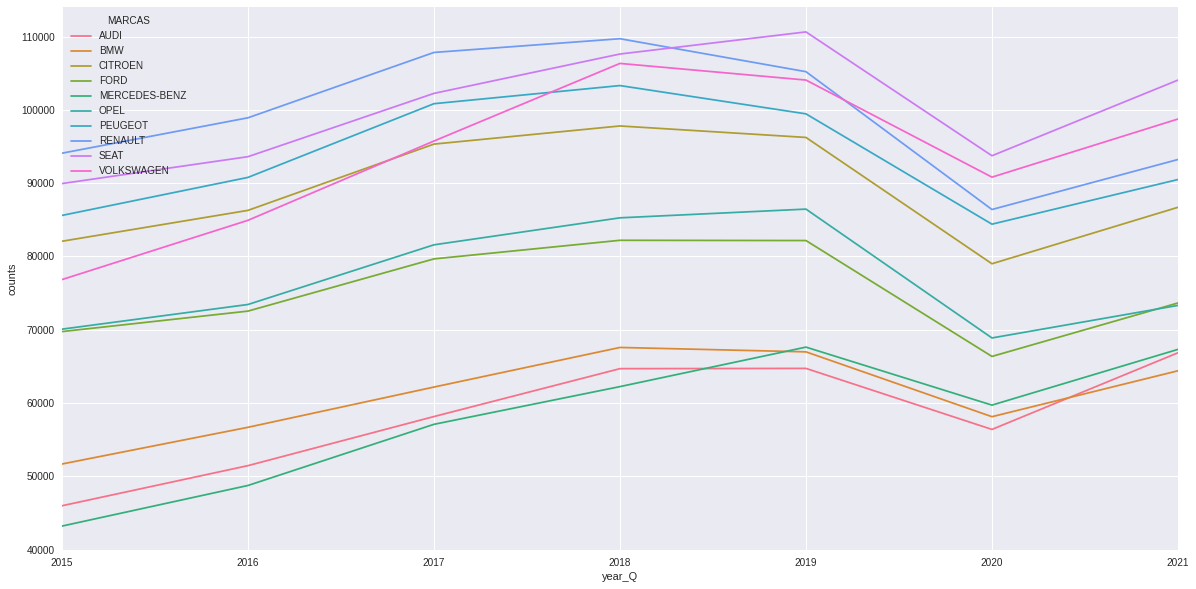

In [29]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['MARCA_ITV','year_Q']).size().reset_index(name='counts')

sns.lineplot(data=grouped[grouped['MARCA_ITV'].isin(
        df.groupby(['MARCA_ITV']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)['MARCA_ITV']
    ) ], x='year_Q', y='counts', hue='MARCA_ITV', legend='full')
ax.set_xlim([2015,2021])
ax.legend(title='MARCAS')

In [30]:
df.groupby(['ID_MUNICIPIO']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)

,ID_MUNICIPIO,counts
27,28,1114125
7,08,849058
45,46,371211
2,03,306171
40,41,298008
28,29,269825
29,30,250708
6,07,198167
44,45,193540
34,35,176346


In [31]:
df.groupby(['ID_MUNICIPIO','year_Q']).size().reset_index(name='counts').sort_values('counts', ascending=False)

,ID_MUNICIPIO,year_Q,counts
193,28,2019,176342
195,28,2021,176094
192,28,2018,175033
191,28,2017,159155
194,28,2020,153248
...,...,...,...
354,51,2019,1583
287,42,2015,1580
362,52,2020,1436
356,51,2021,1432


In [32]:
df['province'] = df['ID_MUNICIPIO'].apply(lambda x: return_province(x))

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

grouped = df.groupby(['province','year_Q']).size().reset_index(name='counts').sort_values('counts', ascending=False)

sns.lineplot(data=grouped[grouped['province'].isin(
        df.groupby(['province']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(10)['province']
    ) ], x='year_Q', y='counts', hue='province', legend='full')
ax.legend(title='PROVINCIAS')

In [ ]:
df.groupby(['PERSONA_FISICA_JURIDICA']).size().reset_index(name='counts').sort_values('counts', ascending=False)

In [ ]:
df.groupby(['PERSONA_FISICA_JURIDICA']).size().reset_index(name='counts').sort_values('counts', ascending=False).plot.bar(x='PERSONA_FISICA_JURIDICA')

In [ ]:
df.groupby(['year_Q', 'PERSONA_FISICA_JURIDICA']).size().reset_index(name='counts')

In [ ]:
df.groupby(['year_Q','ID_MUNICIPIO','PERSONA_FISICA_JURIDICA']).size().reset_index(name='counts')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['year_Q', 'PERSONA_FISICA_JURIDICA']).size().reset_index(name='counts')

grouped['LITERAL_FISICA_JURIDICA'] = grouped['PERSONA_FISICA_JURIDICA'].apply(lambda x: 'Jurídica' if x == 'X' else 'Física')

sns.lineplot(data=grouped, x='year_Q', y='counts', hue='LITERAL_FISICA_JURIDICA', legend='full')

ax.legend(title='PERSONA FISICA JURIDICA')

In [ ]:
df.groupby(['NUM_PLAZAS']).size().reset_index(name='counts')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
df.groupby(['NUM_PLAZAS']).size().reset_index(name='counts').plot.bar(ax=ax)

In [ ]:
df.groupby(['CILINDRADA_ITV']).size().reset_index(name='counts')

In [ ]:
bins = [0, 10, 100, 500, 1000, 5000, 10000, 25000]

df['CILINDRADA_ITV'].value_counts(bins=bins, sort=False).reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

bins = [500, 1000, 1500, 2000, 2500, 3000, 5000]

df['CILINDRADA_ITV'].value_counts(bins=bins, sort=False).reset_index().plot.bar(x='index', y='CILINDRADA_ITV', rot=0, ax=ax)


In [ ]:
df.groupby(['POTENCIA_ITV']).size().reset_index(name='counts')

In [ ]:
bins = [0, 10, 15, 25, 30, 35, 40, 45, 50]

df['POTENCIA_ITV'].value_counts(bins=bins, sort=False).reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

bins = [0, 10, 11, 12, 13, 14, 15, 25, 30, 35]

df['POTENCIA_ITV'].value_counts(bins=bins, sort=False).reset_index().plot.bar(x='index', y='POTENCIA_ITV', rot=0, ax=ax)


In [ ]:
df.groupby(['KW_ITV']).size().reset_index(name='counts')

In [ ]:
df.groupby(['IND_NUEVO_USADO']).size().reset_index(name='counts')

In [ ]:
df.groupby(['IND_NUEVO_USADO']).size().reset_index(name='counts').sort_values('counts', ascending=False).plot.bar(x='IND_NUEVO_USADO')

In [ ]:
df.groupby(['year_Q', 'IND_NUEVO_USADO']).size().reset_index(name='counts')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['year_Q', 'IND_NUEVO_USADO']).size().reset_index(name='counts')

grouped['LITERAL_NUEVO_USADO'] = grouped['IND_NUEVO_USADO'].apply(lambda x: 'Usado' if x == 'U' else 'Nuevo')

sns.lineplot(data=grouped, x='year_Q', y='counts', hue='LITERAL_NUEVO_USADO', legend='full')

ax.legend(title='Turismo Usado / Nuevo')

In [ ]:
df.groupby(['CO2_ITV']).size().reset_index(name='counts')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

bins = [100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

df['CO2_ITV'].value_counts(bins=bins, sort=False).reset_index().plot.bar(x='index', y='CO2_ITV', rot=0, ax=ax)


In [ ]:
df.groupby(['RENTING']).size().reset_index(name='counts')

In [ ]:
df.groupby(['RENTING']).size().reset_index(name='counts').sort_values('counts', ascending=False).plot.bar(x='RENTING')

In [ ]:
df.groupby(['CATEGORÍA_HOMOLOGACIÓN_EUROPEA_ITV']).size().reset_index(name='counts')

In [ ]:
df.groupby(['NIVEL_EMISIONES_EURO_ITV']).size().reset_index(name='counts').sort_values('counts', ascending=False).head(25)

In [ ]:
df.groupby(['CATEGORÍA_VEHÍCULO_ELÉCTRICO']).size().reset_index(name='counts')

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))


df.groupby(['CATEGORÍA_VEHÍCULO_ELÉCTRICO']).size().reset_index(name='counts').sort_values('counts', ascending=False).plot.bar(x='CATEGORÍA_VEHÍCULO_ELÉCTRICO', ax=ax)

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
grouped = df.groupby(['year_Q', 'CATEGORÍA_VEHÍCULO_ELÉCTRICO']).size().reset_index(name='counts')

sns.lineplot(data=grouped, x='year_Q', y='counts', hue='CATEGORÍA_VEHÍCULO_ELÉCTRICO', legend='full')

ax.legend(title='Categoría Vehículo Electrico')

# PHEV Eléctrico Enchufable
# REEV Eléctrico de Autonomía Extendida
# HEV Eléctrico Híbrido
# BEV Eléctrico de Batería

In [ ]:
df.groupby(['AUTONOMÍA_VEHÍCULO_ELÉCTRICO']).size().reset_index(name='counts')

In [ ]:
bins = [1000, 5000, 10000, 15000, 20000]

df['AUTONOMÍA_VEHÍCULO_ELÉCTRICO'].value_counts(bins=bins, sort=False).reset_index()

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

bins = [1000, 5000, 10000, 15000, 20000]

df['AUTONOMÍA_VEHÍCULO_ELÉCTRICO'].value_counts(bins=bins, sort=False).reset_index().plot.bar(x='index', y='AUTONOMÍA_VEHÍCULO_ELÉCTRICO', rot=0, ax=ax)

In [ ]:
sns.heatmap(df.corr(),cmap='BrBG',center=0)